# Google Streeview Dataset Exploration

Matthew K. MacLeod

## Introduction

This project aims to see if we can train a model to tell the difference between retail business and other, where other could mean a countryscape, suburb etc.

The data consists of a total of few thousand images. The data and results obtained from this data are explored further in this notebook.


## Table of Contents
This notebook consists of the following sections

* Validation 
* Visualization
* Results

In [1]:
import sys, os
import datetime

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from collections import Counter

In [2]:
%matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [3]:
import matplotlib
matplotlib.style.use('ggplot')

## Data Validation

In [4]:
df = pd.read_csv('../data/practical_stuff/labels.txt',header=None,names=['Class','Filename'])

In [5]:
df.head()

Class       Filename
0  other   2378600.jpeg
1  other   2378687.jpeg
2  other   2379071.jpeg
3  other   2379113.jpeg
4  other   2379591.jpeg

In [6]:
counts_df_intents = (pd.DataFrame(df.groupby('Class').size().rename('counts'))
                     .sort_values('counts', ascending=False))

In [7]:
# seems we have some mispelled labels
counts_df_intents.head()

counts
Class                    
other              1455  
restaurant/retail  1092  
restaurnt/retail   572

In [8]:
counts_df_intents['counts'].other

1455

In [9]:
# should have this many retail images
counts_df_intents['counts'].sum() - counts_df_intents['counts'].other

1664

In [10]:
df['Class'] = df['Class'].str.replace('restaurant/retail','retail')
df['Class'] = df['Class'].str.replace('restaurnt/retail','retail')

In [11]:
counts_df_intents = (pd.DataFrame(df.groupby('Class').size().rename('counts'))
                     .sort_values('counts', ascending=False))

In [12]:
# this is better
counts_df_intents.head()

counts
Class         
retail  1664  
other   1455

In [13]:
width=10
height=12
bar_color='lightblue'

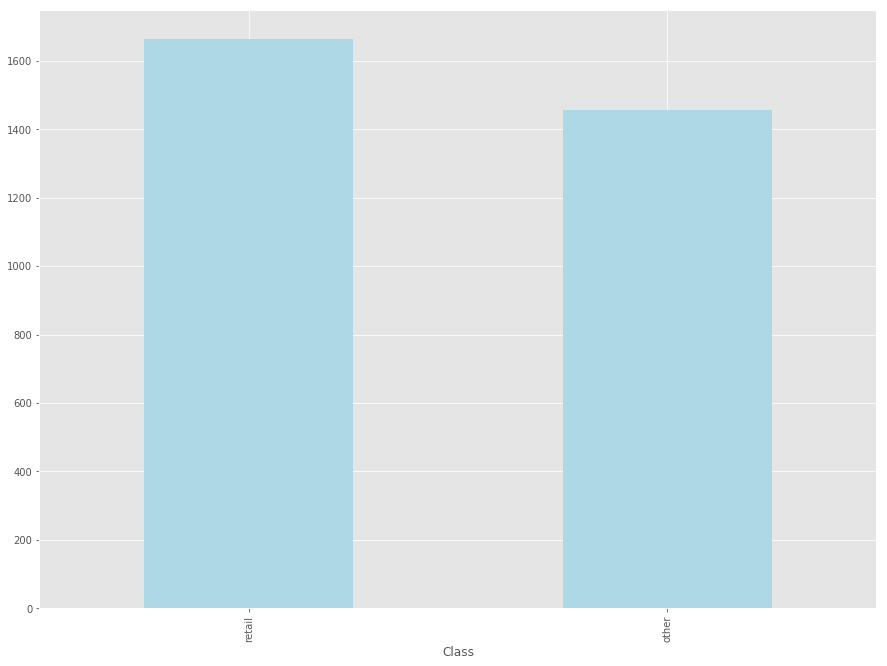

In [14]:
# these are pretty balanced classes
counts_df_intents['counts'].plot(kind='bar',figsize=(width+5, height-1),color=bar_color)

In [15]:
# may want to use a slight weighting during optimization
counts_df_intents['counts'].other / counts_df_intents['counts'].retail

0.87439903846153844

In [16]:
# lets check the labels to make sure each file maps to only one class
len(df), len(df['Filename'].unique())

(3119, 3119)

### Comments on dataset

The data is fairly balanced but rather small amount of examples per class. This is a good situation for transfer learning, where we use weights that have been trained on large amounts of other data and we adapt them to our use case.

## Data Visualization

In [17]:
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os


In [149]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    fig, ax = plt.subplots(figsize=(15,15))
    ax.imshow(inp, interpolation="nearest")
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [102]:
data_dir = '../data'

In [116]:
# use pytorch standard pre-processing since using pytorch weights
mean = [0.485, 0.456, 0.406]
stddev = [0.229, 0.224, 0.225]

data_transforms = {
    'train': transforms.Compose([
        transforms.Scale(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, stddev)
    ]),
    'val': transforms.Compose([
        transforms.Scale(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, stddev)
    ]),
}


image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

class_names = image_datasets['train'].classes

In [104]:
class_names

['other', 'retail']

### Cycle through the training data to spot check

Also want to get a feel for how accurate the labels are on our data. Ideally, one would want to 

1. Take a random sample of the dataset and 
2. Get a handful of experts to label this subset
3. Access accuracy of the dataset labels... and that of the human labels

After these steps are taken, one has a feel for what the machine performance accuracies mean. For some datasets, machine accuracies of 80% may be very good, or they may be dismal..it depends.

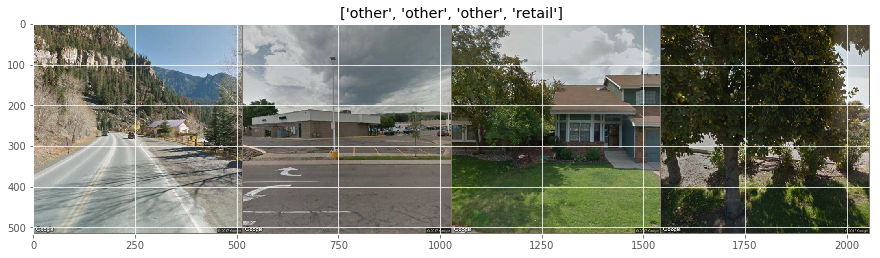

In [105]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
# the second and last label looks wrong

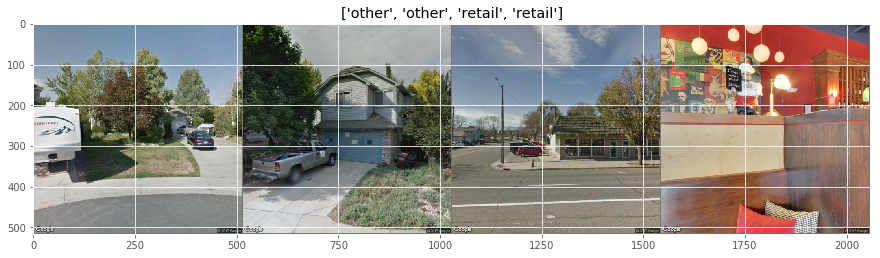

In [106]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

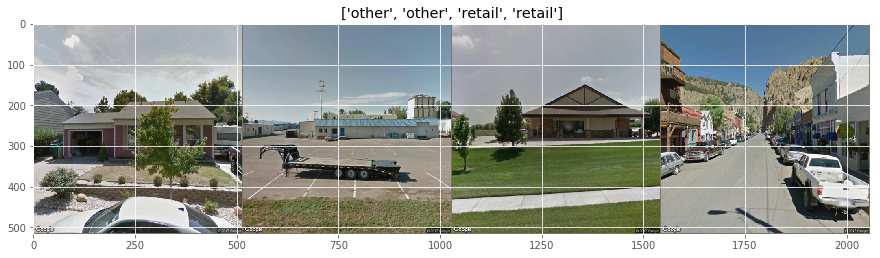

In [107]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

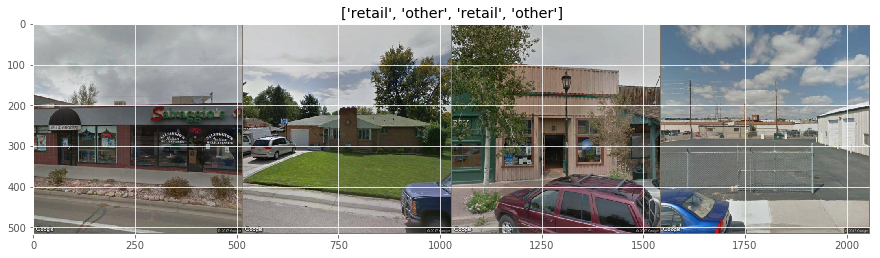

In [108]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

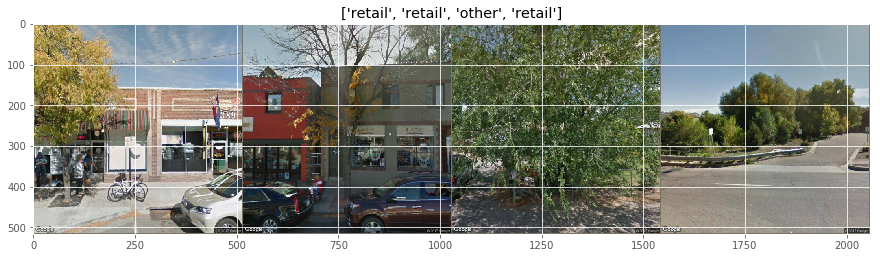

In [109]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

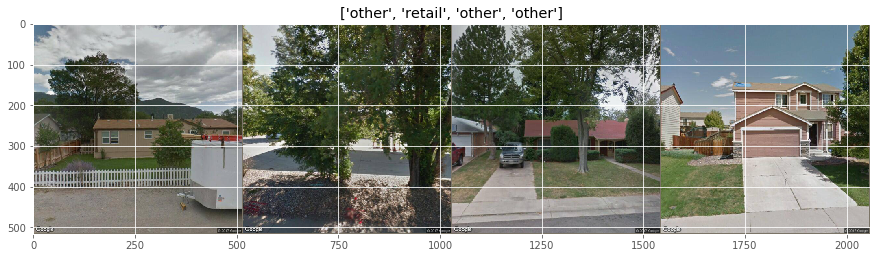

In [111]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
# the above second image is likely wrong

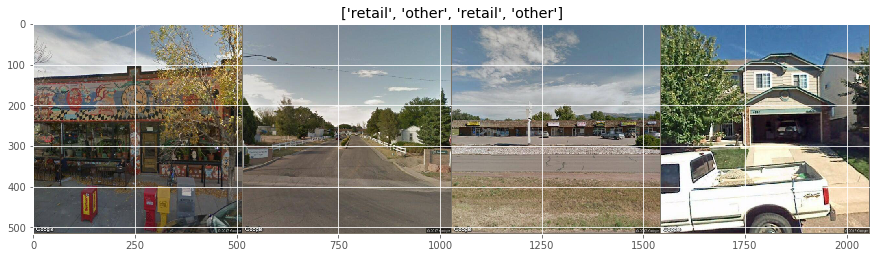

In [110]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

### Cycle through the validation data to spot check
also want to get a feel for how accurate the labels are on our data

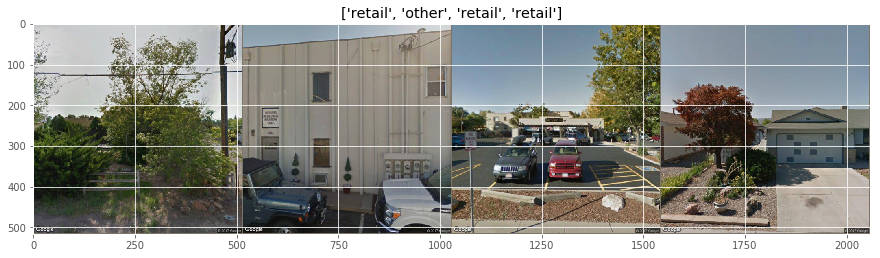

In [112]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['val']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

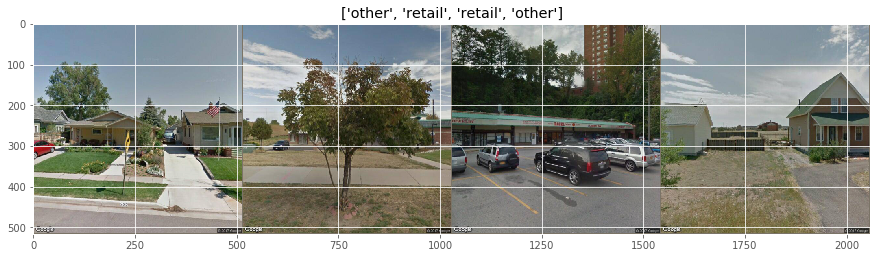

In [113]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

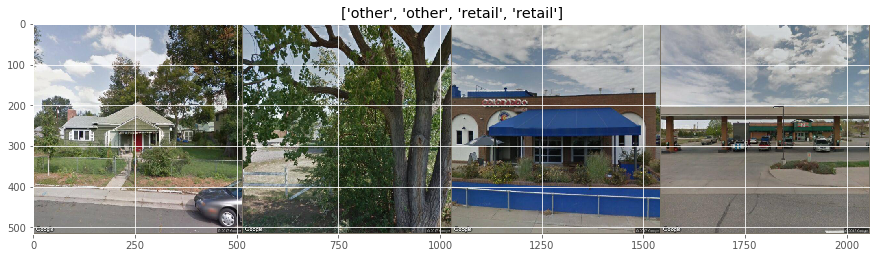

In [114]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
# the above looks good

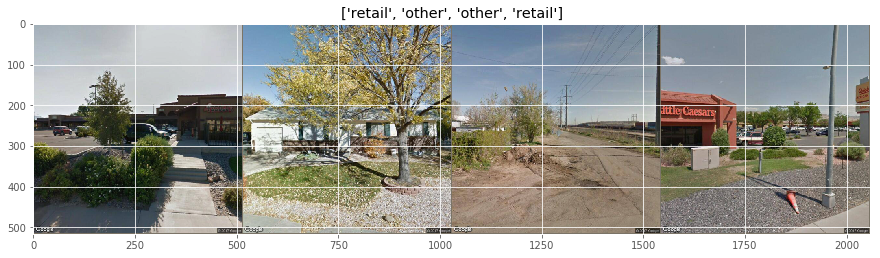

In [115]:
# Get a batch of training data
inputs, classes = next(iter(dataloders['train']))
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [118]:
6/44

0.13636363636363635

### Comments on images and labels

Retail or restaurant images often have lettering or signage. An exception may be factory type buildings, although these seem to be more rare. Signage also appears on side view of semi-truck trailers. 


The small sample of 44 images has about 6 errors the labels, giving a label error rate of around 14%.  This is not too bad if we had more images but may prove to be problematic if we want to achieve high performance with a small dataset.

I have cleaned up the labels. The new file ground truth is in the file `data/corrected_labels.csv`

There were approximately 260 errors in the retail set and 96 in the other category. A lot of images are obviously wrong, so could have been the work of a machine.  There are some images which are difficult to classify as retail or not. For example are motels, storage units retail? I put them in other as one does not typically purchase tangible products at these locations. If by retail one simply means business related that would be a broader definition and require re-labeling.

The data also contains some repeated images. For example, there is a brown office front that is repeated at least a few times in retail and is the the other set as well. See below:



In [239]:
# this image has a retail label:
!grep 2399843 ../data/practical_stuff/labels.txt

In [234]:
from PIL import Image

In [240]:
brown_office_in_retail = Image.open('../data/practical_stuff/all_images/2399843.jpeg')

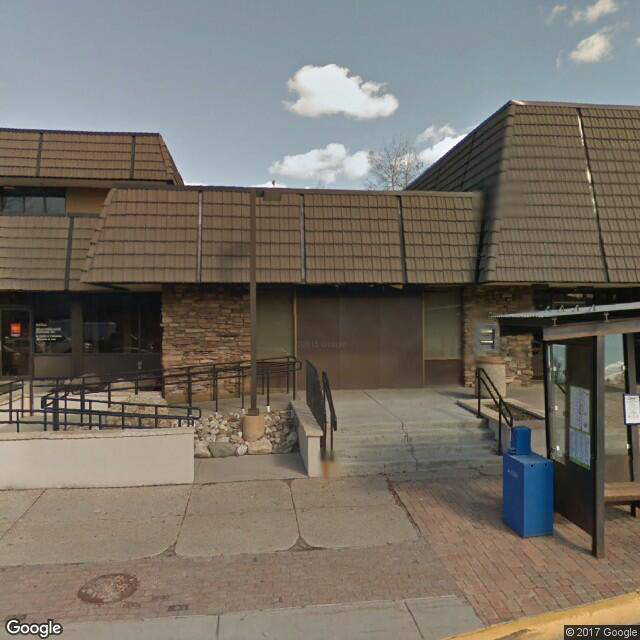

In [241]:
brown_office_in_retail

In [242]:
# this image appears again:
!grep 2354789 ../data/practical_stuff/labels.txt

In [243]:
brown_office_in_retail2 = Image.open('../data/practical_stuff/all_images/2354789.jpeg')

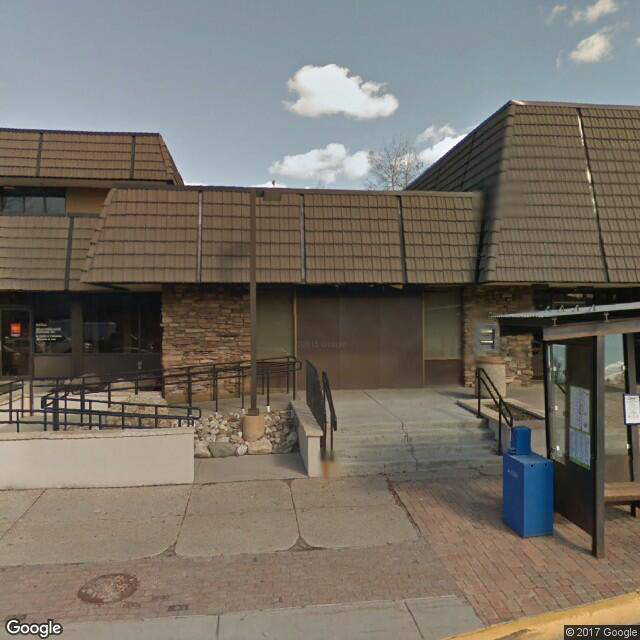

In [244]:
brown_office_in_retail2

In [249]:
# more troublesome is that this image also appears in the other class
!grep 2431909 ../data/practical_stuff/labels.txt

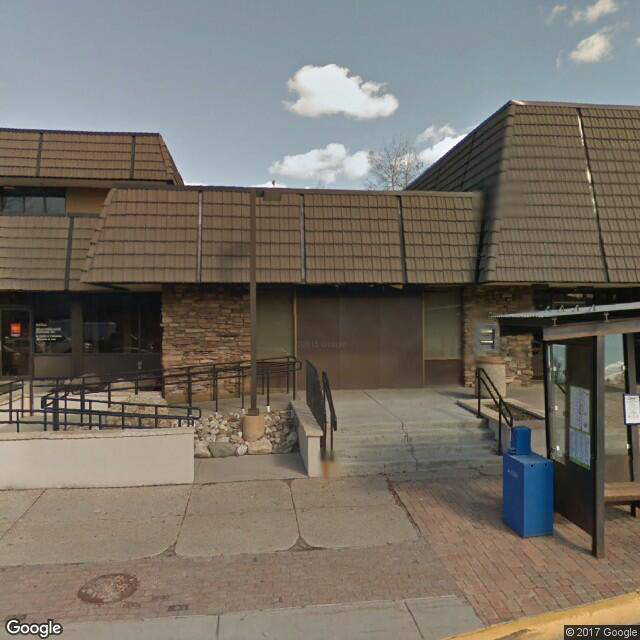

In [250]:
brown_office_in_other = Image.open('../data/practical_stuff/all_images/2431909.jpeg')
brown_office_in_other

## Results


quick visualization of model predictions on validation set

In [136]:
use_gpu = False

In [143]:
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


In [144]:
class RtResnet18ly2(nn.Module):
    ''' re-tune Resnet 18 starting from imagenet weights'''
    def __init__(self, num_classes=2):
        super(RtResnet18ly2, self).__init__()
        original_model = torchvision.models.resnet18(pretrained=True)
        self.features = nn.Sequential(*list(original_model.children())[:-1])
        num_ftrs = original_model.fc.in_features
        self.preclassifier = nn.Sequential(nn.Linear(num_ftrs, 256))
        self.drop = nn.Dropout(0.5)
        self.classifier = nn.Sequential(nn.Linear(256, num_classes))

    def forward(self, x):
        f = self.features(x)
        f = f.view(f.size(0), -1)
        y = self.drop(F.relu(self.preclassifier(f)))
        y = self.classifier(y)
        return y


In [145]:
model = RtResnet18ly2()

In [146]:
# use loading trick since original state dict is from gpu and this notebook is on the cpu
model.load_state_dict(torch.load('../data/models/rt_resnet18ly2_va_0.8202247191011236_model_wts.pkl', map_location=lambda storage, loc: storage))

In [188]:
def validate_imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [189]:
def visualize_model(model, num_images=6):
    images_so_far = 0
    fig = plt.figure(figsize=(10,10))

    for i, data in enumerate(dataloders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)
        
        # need to put model in evaluate model to prevent dropout issues
        model.train(False)
        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images//2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(class_names[preds[j]]))
            validate_imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                return

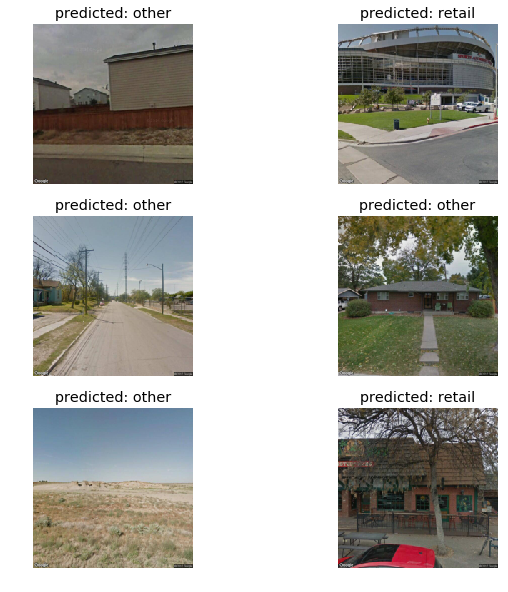

In [190]:
visualize_model(model)

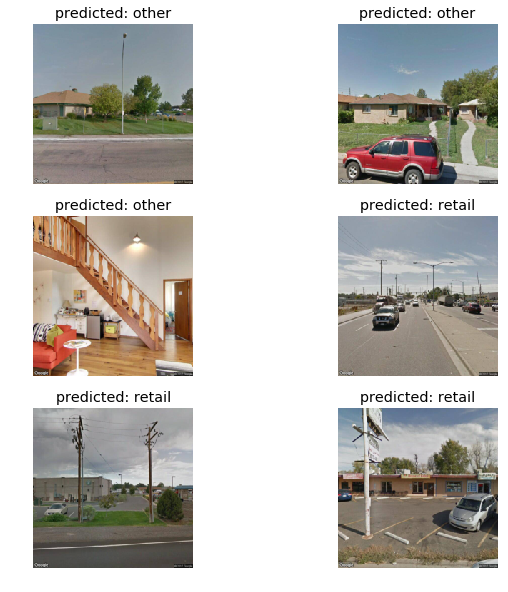

In [191]:
visualize_model(model)

## Explore variance of model accuracies

Our actual model accuracy depends on many factors, here are some:

* random seeds for weight initializations
* amount of data used for testing (size of validation and test sets)
* actual data set used for training
    * correctness of label 
    * amount of data given to model (train-validation split)
    * order of data given to model 
    * batch size
* hyperparameters
    * learning rate and optimizer
    * learning rate reduction scheme
    * dropout and L2 regularization factors
    * number of layers (and sizes)
    * many more
    
    
To test all of these is not easy, we will try to explore a few to get a feel for the variance of our model performance.


### Effect of random seed on model accuracy -- Orignal data labels

Results for best validation accuracies for 100 models based on 80:20 training validation splits our Resnet18 model are shown below:

In [192]:
# distribution of 100 best model accuracies pre-correction
pre_correction = [0.813804, 0.810594, 0.813804, 0.815409, 0.804173,
                  0.817014, 0.818620, 0.821830, 0.817014, 0.805778,
                  0.820225, 0.815409, 0.802568, 0.821830, 0.810594,
                  0.826645, 0.817014, 0.825040, 0.808989, 0.815409,
                  0.826645, 0.815409, 0.808989, 0.825040, 0.828250,
                  0.826645, 0.826645, 0.815409, 0.815409, 0.818620,
                  0.821830, 0.823435, 0.805778, 0.805778, 0.807384,
                  0.820225, 0.823435, 0.817014, 0.820225, 0.812199,
                  0.826645, 0.823435, 0.826645, 0.807384, 0.810594,
                  0.813804, 0.826645, 0.817014, 0.804173, 0.817014,
                  0.815409, 0.833066, 0.808989, 0.815409, 0.818620,
                  0.813804, 0.810594, 0.813804, 0.813804, 0.828250,
                  0.834671, 0.831461, 0.813804, 0.833066, 0.817014,
                  0.825040, 0.820225, 0.823435, 0.800963, 0.815409,
                  0.823435, 0.821830, 0.818620, 0.841091, 0.808989,
                  0.808989, 0.815409, 0.833066, 0.817014, 0.828250, 
                  0.820225, 0.810594, 0.829856, 0.808989, 0.823435,
                  0.817014, 0.813804, 0.821830, 0.804173, 0.808989,
                  0.815409, 0.831461, 0.799358, 0.834671, 0.836276,
                  0.813804, 0.823435, 0.818620, 0.820225,0.837881,
]

In [201]:
import math

In [206]:
def print_summaries(results):
    total = len(results)
    print('Results for',total,'optimizations')
    mean = sum(results) / total
    print('Minimum accuracy:', min(results))
    print('Maximum accuracy:', max(results))
    std = math.sqrt(sum((x-mean)**2 for x in results) / (total-1))
    print('Mean accuracy:   ', mean, '+/-', 2*std)
    return
    

In [207]:
print_summaries(pre_correction)

Results for 100 optimizations
Minimum accuracy: 0.799358
Maximum accuracy: 0.841091
Mean accuracy:    0.8183305900000001 +/- 0.01744302726736678


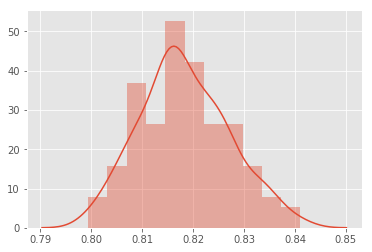

In [200]:
sns.distplot(pre_correction)

### Effect of random seed on model accuracy -- Correct data labels

Results for our Resnet18 model are shown below for 

 `Data set sizes: {'train': 2131, 'val': 531, 'test': 100}`

In [228]:
eighty_twenty = [0.896422, 0.873823, 0.879473, 0.877589, 0.881356,
                 0.881356, 0.883239, 0.873823, 0.870056, 0.887006,
                 0.871940, 0.890772, 0.871940, 0.881356, 0.883239,
                 0.871940, 0.885122, 0.875706, 0.870056, 0.862524,
                 0.870056, 0.873823, 0.887006, 0.877589, 0.879473,
                 0.879473, 0.890772, 0.887006, 0.870056, 0.887006,
                 0.887006, 0.881356, 0.873823, 0.862524, 0.881356,
                 0.871940, 0.887006, 0.881356, 0.881356, 0.887006,
                 0.879473, 0.896422, 0.881356, 0.885122, 0.887006,
                 0.894539, 0.873823, 0.888889, 0.877589, 0.883239,
                 0.870056, 0.870056, 0.879473, 0.875706, 0.875706,
                 0.866290, 0.870056, 0.881356, 0.879473, 0.887006,
                 0.870056, 0.885122, 0.870056, 0.870056, 0.892655,
                 0.877589, 0.875706, 0.868173, 0.887006, 0.873823,
                 0.864407, 0.856874, 0.868173, 0.873823, 0.881356,
                 0.881356, 0.868173, 0.870056, 0.883239, 0.887006,
                 0.868173, 0.873823, 0.887006, 0.883239, 0.888889,
                 0.871940, 0.862524, 0.879473, 0.875706, 0.879473,
                 0.879473, 0.871940, 0.887006, 0.879473, 0.888889,
                 0.877589, 0.868173, 0.888889, 0.879473, 0.900188]


In [229]:
print_summaries(eighty_twenty)

Results for 100 optimizations
Minimum accuracy: 0.856874
Maximum accuracy: 0.900188
Mean accuracy:    0.87864407 +/- 0.016770337021616028


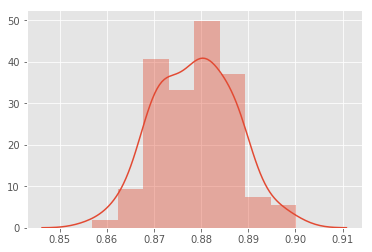

In [230]:
sns.distplot(eighty_twenty)

In [221]:
# test results for these models
eighty_twenty_tests = [0.9100, 0.9000, 0.8500, 0.8700, 0.8900,
                       0.8800, 0.8700, 0.8400, 0.8900, 0.9200,
                       0.9100, 0.8800, 0.8700, 0.8600, 0.8600,
                       0.8300, 0.9100, 0.8600, 0.8900, 0.8800,
                       0.8800, 0.8700, 0.8600, 0.9000, 0.8800,
                       0.8700, 0.9000, 0.8700, 0.8900, 0.8800,
                       0.8500, 0.8900, 0.8800, 0.8800, 0.9000,
                       0.8700, 0.8800, 0.8700, 0.8900, 0.8500,
                       0.8800, 0.8600, 0.8700, 0.9200, 0.8800,
                       0.8400, 0.9200, 0.8400, 0.8800, 0.8600,
                       0.8800, 0.8900, 0.8600, 0.8500, 0.8900,
                       0.8800, 0.8800, 0.9100, 0.9000, 0.8600,
                       0.9300, 0.8800, 0.8800, 0.8500, 0.8600,
                       0.9000, 0.8500, 0.8500, 0.8800, 0.8800,
                       0.8700, 0.9000, 0.9000, 0.8800, 0.8900,
                       0.8600, 0.8600, 0.8500, 0.8600, 0.8900,
                       0.8900, 0.8800, 0.8700, 0.9000, 0.8600,
                       0.8300, 0.8800, 0.8800, 0.8900, 0.8900,
                       0.8900, 0.9000, 0.8800, 0.8700, 0.8500,
                       0.9200, 0.8700, 0.8900, 0.8800, 0.8500]


In [222]:
print_summaries(test_accuracies)

Results for 100 optimizations
Minimum accuracy: 0.8767
Maximum accuracy: 0.9384
Mean accuracy:    0.9063120000000003 +/- 0.02391345135181357


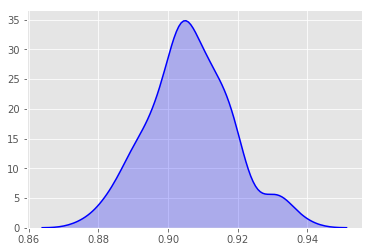

In [227]:
sns.kdeplot(test_accuracies ,color='blue',shade=True)

Commentary: the plot is a bit more irregular due to the fact that we these numbers come from averages on only 100 test images opposed to around 500 validation images

## Effect of train validation split

90:10 split is used here:

 `Data set sizes: {'train': 2397, 'val': 265, 'test': 100}`
 

In [215]:
ninety_ten = [0.894340, 0.894340, 0.890566, 0.890566, 0.905660,
              0.898113, 0.901887, 0.894340, 0.898113, 0.913208,
              0.890566, 0.909434, 0.916981, 0.886792, 0.901887,
              0.905660, 0.894340, 0.909434, 0.886792, 0.879245,
              0.905660, 0.886792, 0.901887, 0.886792, 0.901887,
              0.879245, 0.913208, 0.905660, 0.901887, 0.913208,
              0.909434, 0.894340, 0.890566, 0.886792, 0.898113,
              0.886792, 0.901887, 0.901887, 0.901887, 0.905660,
              0.898113, 0.890566, 0.909434, 0.901887, 0.894340,
              0.901887, 0.905660, 0.905660, 0.901887, 0.905660,
              0.898113, 0.890566, 0.905660, 0.879245, 0.898113,
              0.898113, 0.883019, 0.905660, 0.898113, 0.905660,
              0.905660, 0.898113, 0.905660, 0.905660, 0.894340,
              0.894340, 0.886792, 0.894340, 0.909434, 0.894340,
              0.916981, 0.905660, 0.901887, 0.905660, 0.905660,
              0.913208, 0.898113, 0.890566, 0.916981, 0.886792,
              0.916981, 0.901887, 0.901887, 0.894340, 0.905660,
              0.920755, 0.898113, 0.916981, 0.894340, 0.913208,
              0.905660, 0.901887, 0.916981, 0.894340, 0.901887,
              0.909434, 0.920755, 0.894340, 0.890566, 0.890566]

In [216]:
print_summaries(ninety_ten)

Results for 100 optimizations
Minimum accuracy: 0.879245
Maximum accuracy: 0.920755
Mean accuracy:    0.9003395900000002 +/- 0.018981102617428042


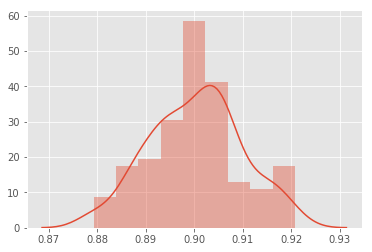

In [217]:
sns.distplot(ninety_ten)

In the 90-10 train-validation split we used 2397 and 265 examples respectively. More training could have given us more accuracy, but the lower amount of validation looks to have given more variance to the results. We should compare against the same test holdout.

In [218]:
ninety_ten_test = [0.8900, 0.8800, 0.9000, 0.9000, 0.9200,
                   0.9000, 0.8700, 0.8900, 0.8400, 0.9200,
                   0.9200, 0.8800, 0.8800, 0.8900, 0.9000,
                   0.9100, 0.9000, 0.8900, 0.8900, 0.9000,
                   0.8800, 0.9100, 0.8800, 0.8900, 0.9000,
                   0.9100, 0.8800, 0.9000, 0.9100, 0.9000,
                   0.9000, 0.8900, 0.8600, 0.8700, 0.8700,
                   0.8900, 0.8900, 0.8900, 0.9000, 0.8700,
                   0.8600, 0.8800, 0.9100, 0.8900, 0.9200,
                   0.9100, 0.9000, 0.9300, 0.8700, 0.9200,
                   0.9000, 0.8600, 0.8800, 0.8700, 0.8800,
                   0.9000, 0.9000, 0.8800, 0.8800, 0.9100,
                   0.8900, 0.8800, 0.8700, 0.9200, 0.8600,
                   0.9100, 0.9300, 0.8800, 0.9300, 0.8900,
                   0.9000, 0.8600, 0.8900, 0.8700, 0.8900,
                   0.8800, 0.8500, 0.8700, 0.8800, 0.8500,
                   0.9300, 0.8700, 0.9400, 0.8700, 0.8600,
                   0.8800, 0.9000, 0.8800, 0.8800, 0.9400,
                   0.9100, 0.8700, 0.9000, 0.8600, 0.8900,
                   0.9000, 0.8600, 0.8900, 0.9000, 0.9000]

In [219]:
print_summaries(ninety_ten_test)

Results for 100 optimizations
Minimum accuracy: 0.84
Maximum accuracy: 0.94
Mean accuracy:    0.8904000000000001 +/- 0.041186444764306086


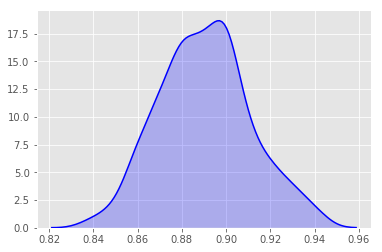

In [226]:
sns.kdeplot(ninety_ten_test, color='blue', shade=True)

## Effect of data used to train model

Here we use 5 fold cross-validation to test the effect of different training data on the model performance.


| Fold | Validation Accuracy  | Test Accuracy |
|:-----|:---------------------|:--------------|
| 1      | 0.90  | 0.89 |
| 2 | 0.87 | 0.87 |
| 3 | 0.90 | 0.86 |
| 4 | 0.87 | 0.88|
| 5| 0.89 | 0.82 |

In [232]:
# 5-fold validation accuracy summary
print_summaries([0.90,0.87,0.90,0.87,0.89])

Results for 5 optimizations
Minimum accuracy: 0.87
Maximum accuracy: 0.9
Mean accuracy:    0.8859999999999999 +/- 0.030331501776206228


In [233]:
# 5-fold test set perfomance
print_summaries([0.89,0.87,0.86,0.88,0.82])

Results for 5 optimizations
Minimum accuracy: 0.82
Maximum accuracy: 0.89
Mean accuracy:    0.8640000000000001 +/- 0.054037024344425234


Comments: this is a very small sample but we expect the data to have a larger influence on model than the random seed so it seems reasonable.

## Summary

The model accuracies are sensitive to messy labels as shown from the difference in accuracies between pre-corrected labels and corrected labels. The 100 precorrected models trained with an 80:20 train validation split had a validation mean of 81.8 +/- 1.7 % and the corresponding 100 post-correction models had a mean of 87.9 +/- 1.7 %.  The highest validation accuracy obtained from post-corrected models was 90.0 %. Since the classes were balanced it means that our models are performing well for both classes.

The small amount of data makes the models very sensitive to all the parameters listed above in the model variance section. In general the numbers for the small test set very (90.6 +/- 2.4 %) for this reason as do the validation mean of the 90:10 split (90.0 +/- 1.9 %).  In the future a total test set size of 200 rather than 100 would be advisable.

Additional data augmentations could be added in future testing. These could include random brightness or slight tilts since they would be natural to this dataset. Horizontal flips are a bit questionalble since detection of letters is likely to be an important feature which the neural networks learn.

Deeper networks would also likely perform better. But many of the weights should be frozen as it is easy to overfit on this amount of data.